In [342]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

In [343]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [344]:
dengues = glob.glob("temp/*.csv")
dengues = dengues[:-2]

In [345]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

In [346]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

In [347]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

def plotByDate(allDates,title):
    df = pd.DataFrame(allDates,columns=['date'])
    df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
    plt.grid(True);
    plt.title(title)
    plt.xlabel("Weeks")
    plt.ylabel("Cases")
#     plt.savefig(title+".png",dpi = 150)

def cleanDate(raw_dates):
    toRemove = []
    for i,elt in enumerate(raw_dates):
        if elt == '0000-00-00' or type(elt) == float:
            print "to be removed", i, elt
            toRemove.append(i)

    raw_dates = np.delete(raw_dates, toRemove, axis=0)
    return raw_dates

In [348]:
unique_province = [
                   '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33',
                   '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45',
                   '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
                   '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '70',
                   '71', '72', '73', '74', '75', '76', '77', '80', '81', '82', '83',
                   '84', '85', '86', '90', '91', '92', '93', '94', '95', '96'
                  ]
allProvinces = seperate(allDengue_copy,unique_province)

In [349]:
allProvinces_copy = allProvinces.copy()
allProvinces_copy = allProvinces_copy[:-1]

# temp = allProvinces_copy[0]
# for i in allProvinces_copy[:3]:
    
allProvinces_copy = np.concatenate(([i for i in allProvinces_copy[:]]),axis=0)

In [350]:
allProvinces_df = pd.DataFrame(allProvinces_copy)
allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20],axis=1)
allProvinces_df.columns = ['โรค', 'รหัสจังหวัด', 'date']
allProvinces_df['รหัสจังหวัด'] = allProvinces_df['รหัสจังหวัด'].astype('str').str[:2]
allProvinces_df = allProvinces_df.sort_values(by='date')
allProvinces_df = allProvinces_df.drop(138990)

In [351]:
allProvinces_df.head()

โรค รหัสจังหวัด        date
717761  66          80  2003-01-01
140119  26          13  2003-01-01
768849  26          84  2003-01-01
289428  26          31  2003-01-01
849912  26          95  2003-01-01

In [352]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [353]:
allProvinces_df = allProvinces_df[allProvinces_df['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in allProvinces_df['รหัสจังหวัด']])
allProvinces_df['จังหวัด'] = provinces

In [354]:
date_df = allProvinces_df.copy()

In [355]:
date_df.date = pd.DatetimeIndex(date_df.date)
# allProvinces_date_df.index = pd.PeriodIndex(date_df.date,freq='M')
date_df.index = date_df.date

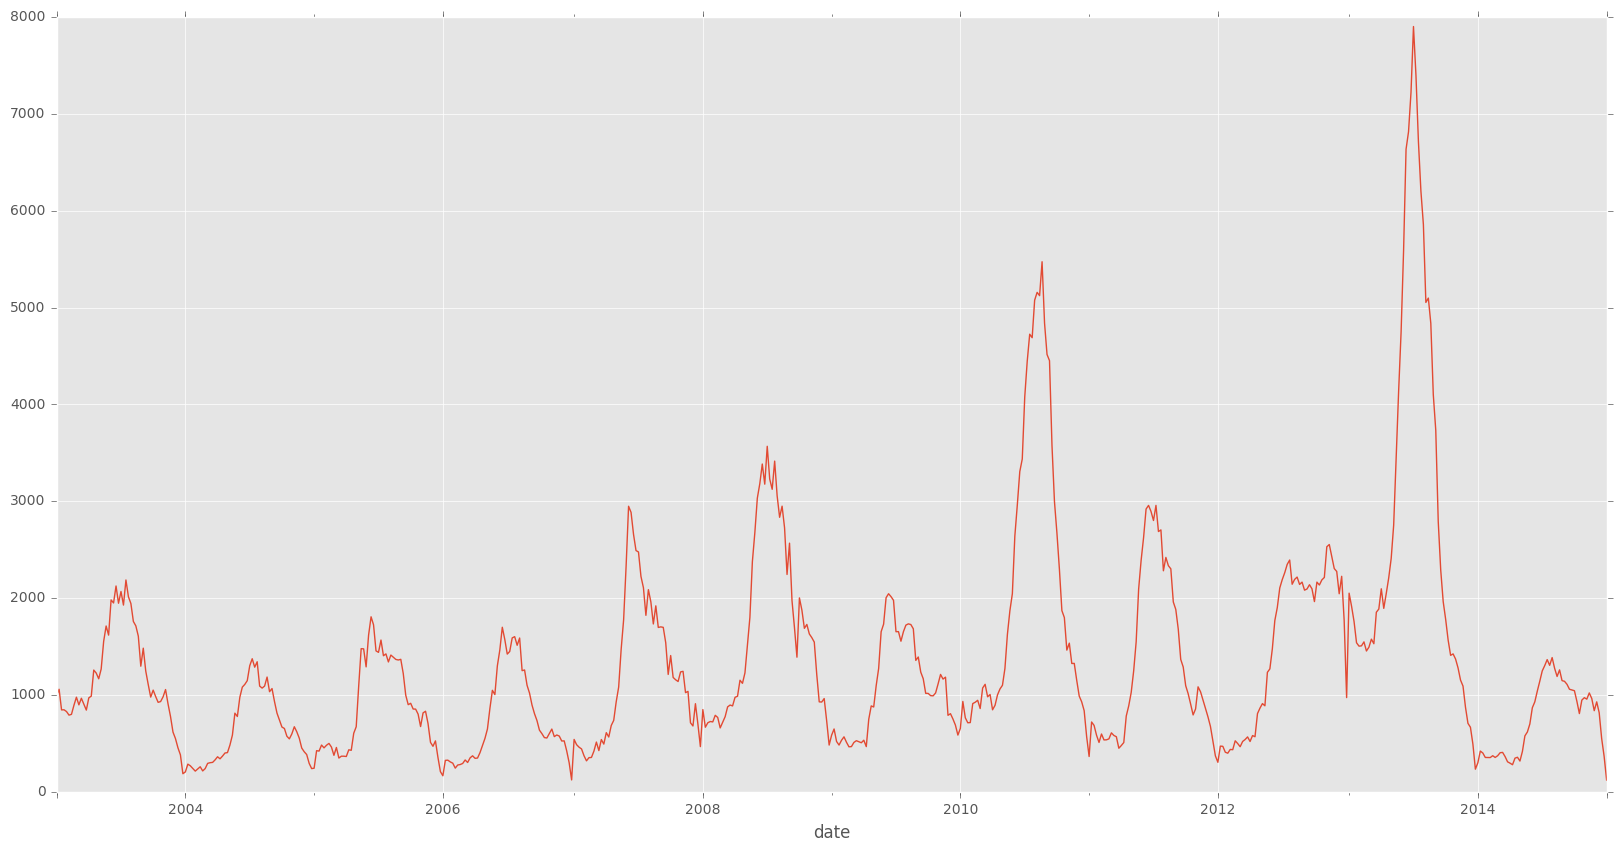

In [356]:
weekly_df = date_df.resample('W').size()
weekly_df.plot(kind='line',figsize=(20,10))

In [357]:
weekly_df = pd.DataFrame(weekly_df)
weekly_df.columns = ['cases']

In [358]:
weekly_df['casesMean'] = weekly_df['cases'].mean()

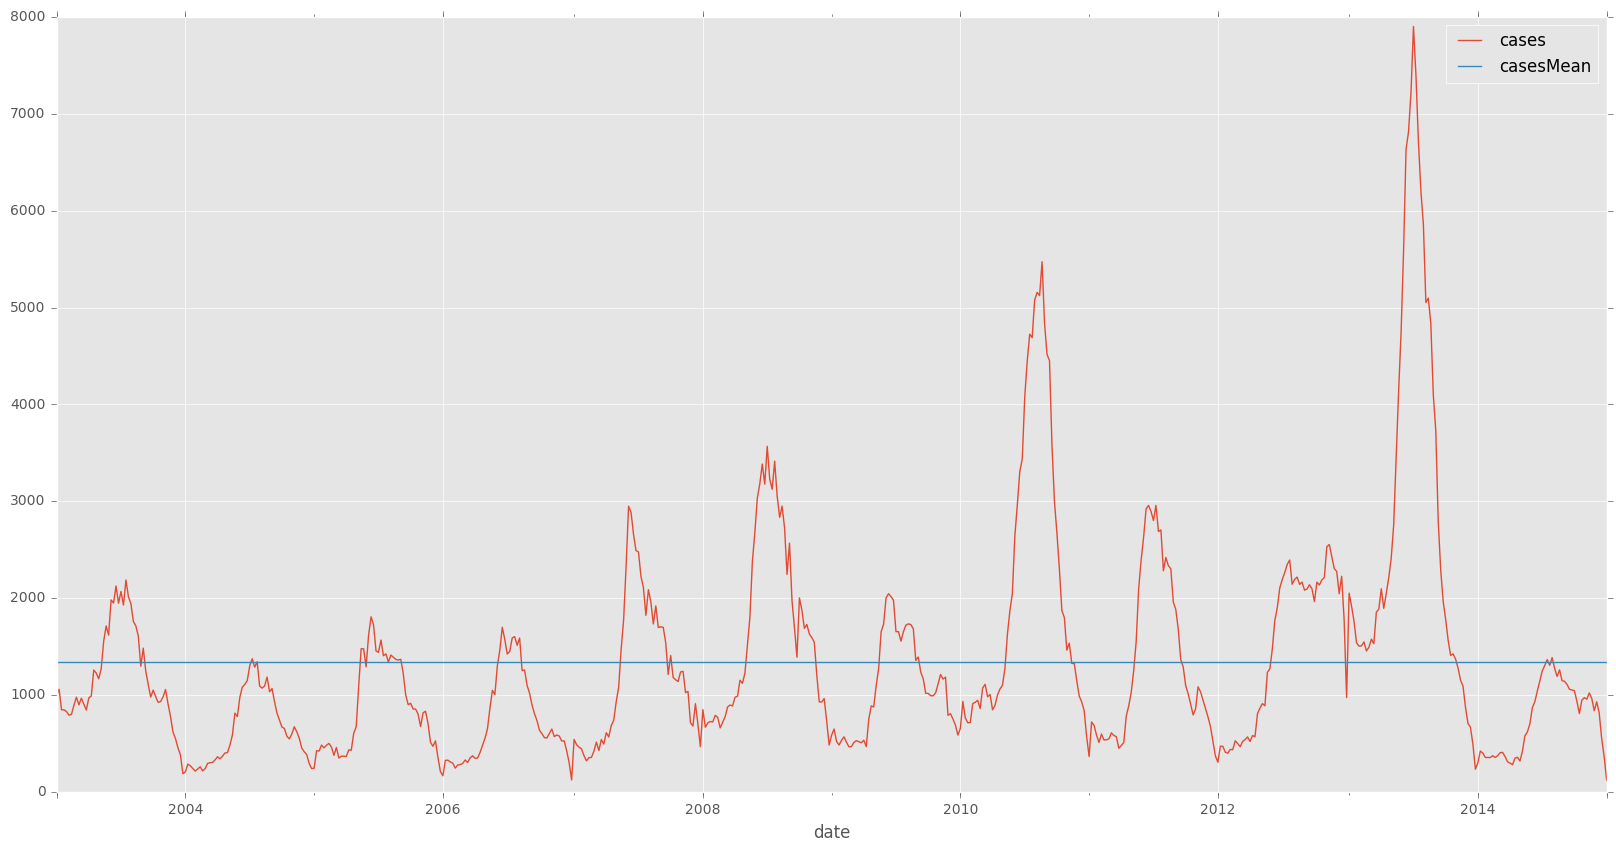

In [359]:
weekly_df.plot(kind="line", y = ['cases','casesMean'],figsize=(20,10))

In [360]:
weekly_df['date'] = weekly_df.index

In [361]:
weekly_df.date.min()

Timestamp('2003-01-05 00:00:00')

In [362]:
weekly_df["timeIndex"] = weekly_df.date - weekly_df.date.min()

In [363]:
weekly_df.head()

cases  casesMean       date  timeIndex
date                                              
2003-01-05    998       1345 2003-01-05     0 days
2003-01-12   1060       1345 2003-01-12     7 days
2003-01-19    847       1345 2003-01-19    14 days
2003-01-26    848       1345 2003-01-26    21 days
2003-02-02    830       1345 2003-02-02    28 days

In [364]:
weekly_df['timeIndex'] = weekly_df['timeIndex']/np.timedelta64(1,'W')

In [365]:
weekly_df['timeIndex'] = weekly_df['timeIndex'].round(0).astype(int)

In [366]:
model_linear = smf.ols('cases ~ timeIndex', data = weekly_df).fit()

In [367]:
# model_linear.summary()

In [368]:
# model_linear.params

In [369]:
# model_linear_pred = model_linear.predict()

In [370]:
# weekly_df.plot(kind="line", x="timeIndex", y = ["cases","casesMean"],figsize=(20,10))
# plt.plot(weekly_df.timeIndex,model_linear_pred)

In [371]:
# model_linear.resid.plot(kind="bar",figsize=(50,10))

### Moving Avg

In [372]:
# weekly_df['movingAvg'] = pd.rolling_mean(weekly_df.cases, window=52)

In [373]:
# weekly_df.plot(kind="line",y=['cases','movingAvg'],figsize=(20,10))

## Simple Exponential Smoothing Model (SES)
$$ \hat{y_x} = \alpha y_{x} + (1-\alpha)\hat{y_{x-1}} \\$$

In [374]:
# exponential weighted moving average
weekly_df['SES'] = pd.ewma(weekly_df.cases, halflife=4)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=4,ignore_na=False,min_periods=0,adjust=True).mean()
  from ipykernel import kernelapp as app


In [375]:
decay = 52
alpha = 1 - np.exp(np.log(0.5)/decay)
alpha

0.013241305740134823

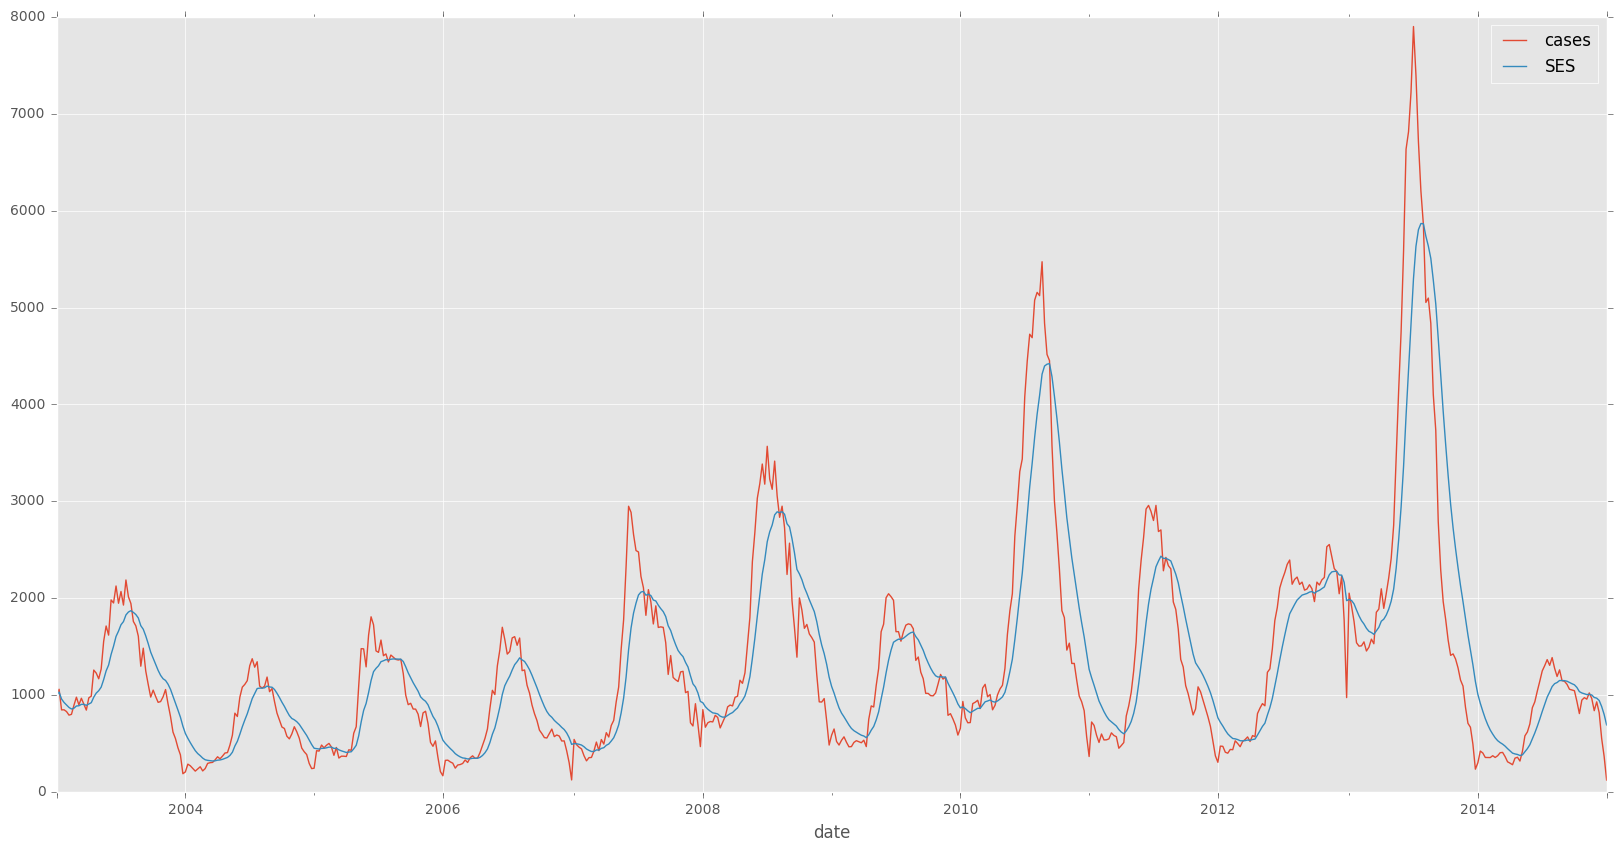

In [376]:
weekly_df.plot(kind="line", y=['cases','SES'],figsize=(20,10))

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if __name__ == '__main__':


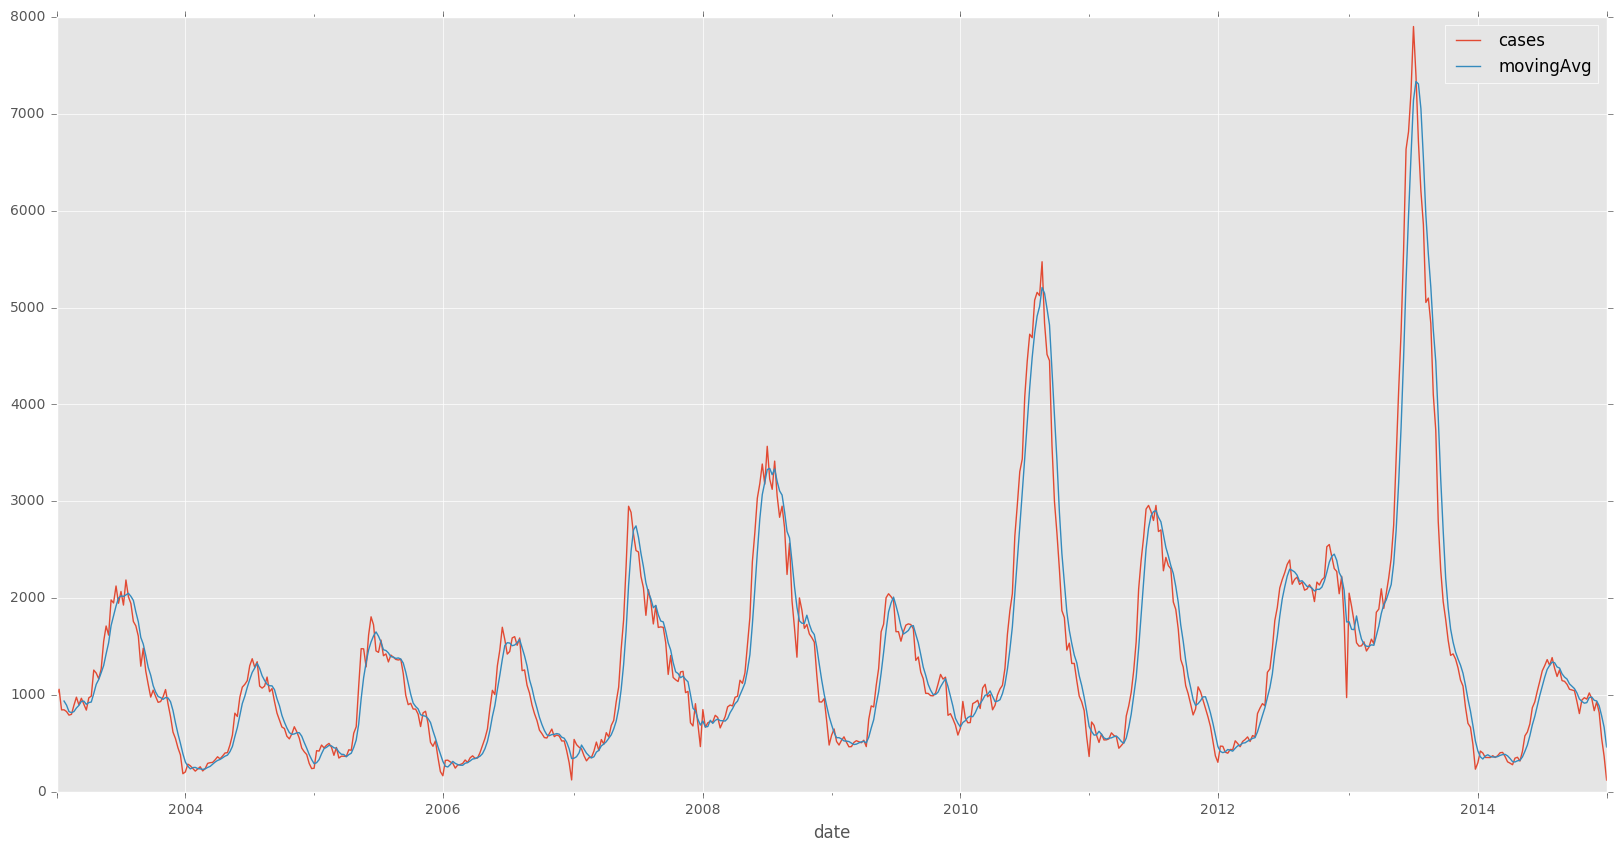

In [421]:
weekly_df['movingAvg'] = pd.rolling_mean(weekly_df.cases, window=4)
weekly_df.plot(kind="line",y=['cases','movingAvg'],figsize=(20,10))

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


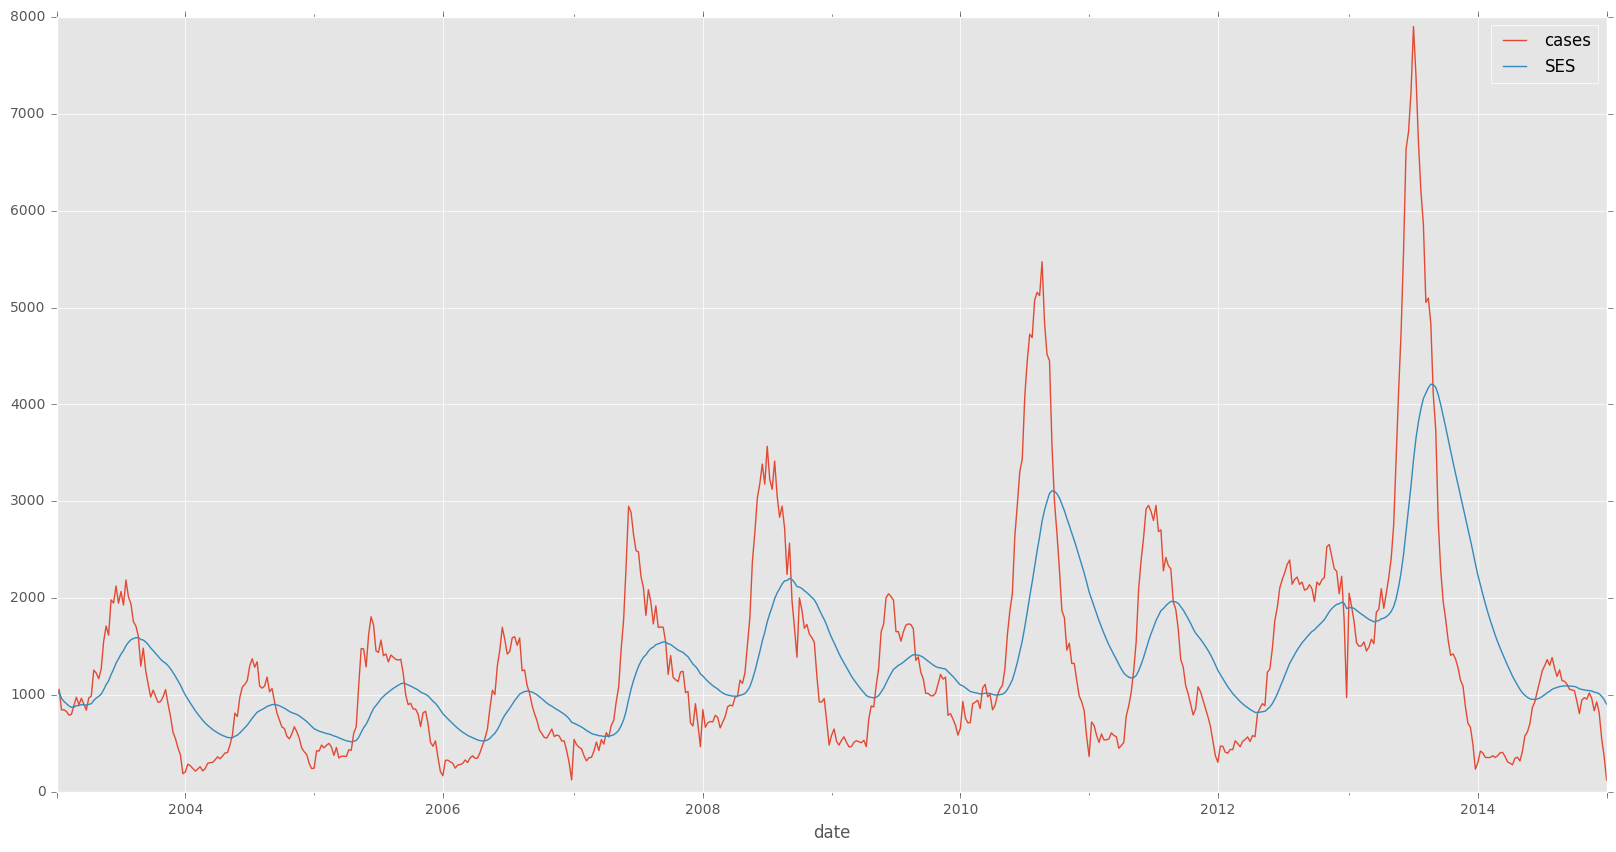

In [378]:
weekly_df['SES'] = pd.ewma(weekly_df.cases, halflife=12)
weekly_df.plot(kind="line", y=['cases','SES'],figsize=(20,10))

In [379]:
def stationarity_test(df):
    print 'Results of Dickey-Fuller Test:'    
    dftest = adfuller(df)
    indices = ['Test Statistic', 'p-value', 'No. Lags Used', 'Number of Observations Used']
    output = pd.Series(dftest[0:4], index=indices)
    for key, value in dftest[4].items():
        output['Critical Value (%s)' % key] = value
    print output

In [380]:
stationarity_test(weekly_df.cases)

Results of Dickey-Fuller Test:
Test Statistic                -5e+00
p-value                        1e-05
No. Lags Used                  1e+01
Number of Observations Used    6e+02
Critical Value (5%)           -3e+00
Critical Value (1%)           -3e+00
Critical Value (10%)          -3e+00
dtype: float64


### AIC estimates the quality of each model, BIC is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred

In [381]:
from statsmodels.tsa.stattools import arma_order_select_ic

print arma_order_select_ic(weekly_df.cases, 
         ic=['aic', 'bic'], trend='nc', 
         max_ar=4, max_ma=4, 
         fit_kw={'method': 'css-mle'})

{'bic_min_order': (2, 3), 'aic_min_order': (3, 4), 'bic':       0      1     2     3     4
0   NaN  10355  9775  9448  9148
1  8491   8447  8428  8383  8340
2  8420   8352  8339  8327  8332
3  8377   8348  8332  8333  8330
4  8338   8340  8331  8338  8337, 'aic':       0      1     2     3     4
0   NaN  10346  9762  9430  9126
1  8482   8433  8410  8361  8313
2  8407   8335  8317  8300  8301
3  8359   8326  8306  8302  8294
4  8316   8314  8300  8302  8297}


/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [382]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
# Fit the model
ts = pd.Series(weekly_df.cases.astype('float'), index=weekly_df.index)
model = ARMA(ts, order=(2, 3))
results = model.fit(trend='nc', method='css-mle', disp=-1)
print(results.summary2())

                            Results: ARMA
Model:              ARMA             BIC:                 8326.7366 
Dependent Variable: cases            Log-Likelihood:      -4144.0   
Date:               2017-04-07 15:59 Scale:               1.0000    
No. Observations:   627              Method:              css-mle   
Df Model:           5                Sample:              01-05-2003
Df Residuals:       622                                   01-04-2015
Converged:          1.0000           S.D. of innovations: 178.795   
AIC:                8300.0910        HQIC:                8310.443  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
ar.L1.cases      1.7089    0.0531   32.1807  0.0000   1.6048   1.8129
ar.L2.cases     -0.7198    0.0526  -13.6891  0.0000  -0.8228  -0.6167
ma.L1.cases     -0.5864    0.0600   -9.7802  0.0000  -0.

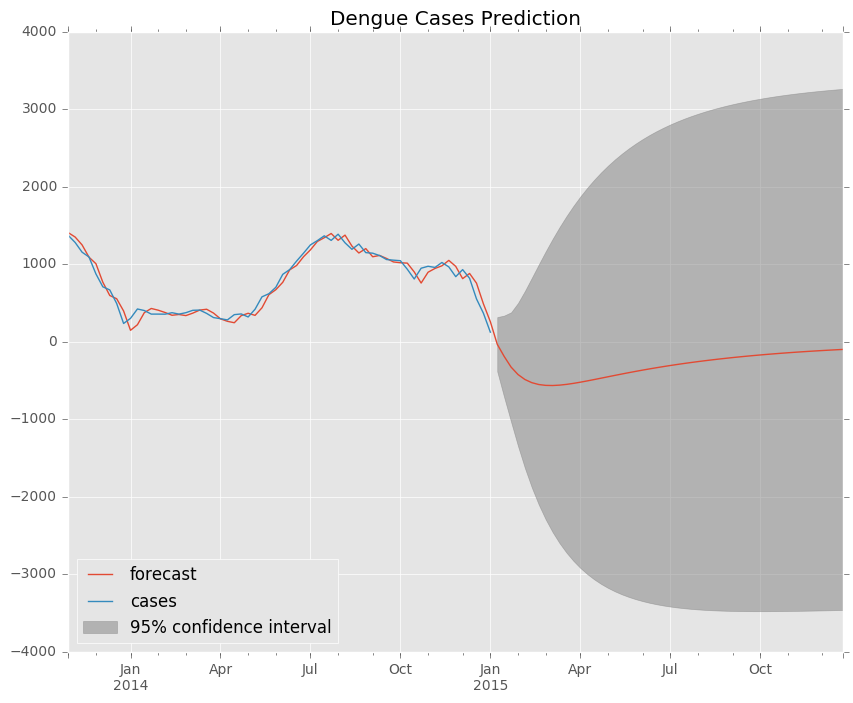

In [383]:
# Plot the model
fig, ax = plt.subplots(figsize=(10, 8))
fig = results.plot_predict('2013-11-03', '2016-01-01', ax=ax)
ax.legend(loc='lower left')
plt.title('Dengue Cases Prediction')
plt.show()

In [384]:
predictions = results.predict('2013-11-03', '2016-01-01')

                           Results: ARIMA
Model:              ARIMA            BIC:                 8326.3179 
Dependent Variable: D.cases          Log-Likelihood:      -4140.6   
Date:               2017-04-07 15:59 Scale:               1.0000    
No. Observations:   626              Method:              css-mle   
Df Model:           6                Sample:              01-12-2003
Df Residuals:       620                                   01-04-2015
Converged:          1.0000           S.D. of innovations: 180.360   
AIC:                8295.2425        HQIC:                8307.316  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
---------------------------------------------------------------------
const           -2.6905   17.8429  -0.1508  0.8802  -37.6620  32.2810
ar.L1.D.cases    0.8807    0.1937   4.5471  0.0000    0.5011   1.2603
ar.L2.D.cases   -0.1715    0.1610  -1.0657  0.2870   -0.

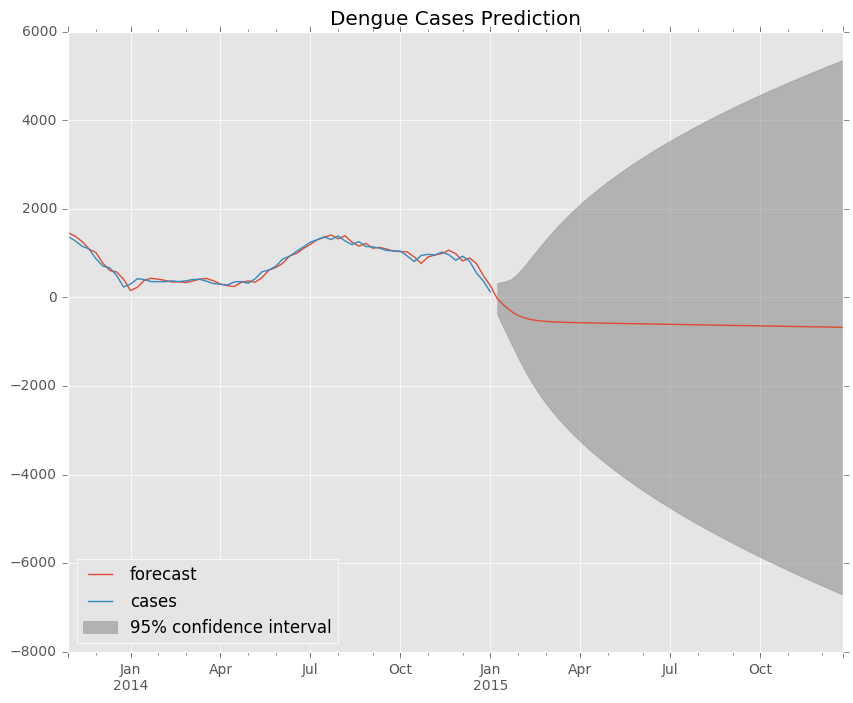

In [385]:
# Fit the model ARIMA
model_arima = ARIMA(ts, order=(2, 1, 3))
results_arima = model_arima.fit(disp=-1, transparams=True)
print(results_arima.summary2())

# Plot the model
fig, ax = plt.subplots(figsize=(10, 8))
fig = results_arima.plot_predict('2013-11-03', '2016-01-01', ax=ax)
ax.legend(loc='lower left')
plt.title('Dengue Cases Prediction')
plt.show()

predictions = results_arima.predict('2013-11-03', '2016-01-01')

In [386]:
bkkCases = allProvinces_df[allProvinces_df['จังหวัด'] == "Bangkok"]
# allProvinces_df

In [387]:
bkkCases.head()

โรค รหัสจังหวัด        date  จังหวัด
7810  26          10  2003-01-01  Bangkok
262   26          10  2003-01-01  Bangkok
7541  66          10  2003-01-01  Bangkok
7212  26          10  2003-01-01  Bangkok
183   26          10  2003-01-01  Bangkok

In [388]:
bkkCases = bkkCases.sort_values(by='date')
# bkkCases.index = pd.PeriodIndex(bkkCases.date, freq='M')

In [389]:
bkkCases['year'] = bkkCases['date'].astype('str').str[:4]

In [390]:
bkkCases['monthVal'] = pd.DatetimeIndex(bkkCases['date']).month

In [391]:
# bkkCases.groupby[date_df.index,'จังหวัด']

In [392]:
# dates = bkkCases['date']
# temp = cleanDate(dates).astype("datetime64")
# df = pd.DataFrame(temp,columns=['date'])
# df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="line",figsize=(120,8))

In [393]:
freq_week = pd.DataFrame(a)

In [395]:
a = pd.DataFrame(bkkCases.groupby([bkkCases['year'],bkkCases['monthVal']]).size())


In [396]:
a.columns = ['bkk_freq']

In [397]:
yr = [i for i in range(3,15)]
mth = [i for i in range(1,13)]


In [398]:
yr_tmp = []
mth_tmp = []
freq_tmp = []
for idx, iele in enumerate(yr):
    for jdx, jele in enumerate(mth):
        yr_tmp.append(iele)
        mth_tmp.append(jele)

for i in a.bkk_freq:
    freq_tmp.append(i)

In [399]:
yr_tmp = np.array(yr_tmp)
mth_tmp = np.array(mth_tmp)
freq_tmp = np.array(freq_tmp)

In [400]:
bkk_df = pd.DataFrame(yr_tmp)
bkk_df['mth'] = pd.Series(mth_tmp)
bkk_df['freq'] = pd.Series(freq_tmp)
bkk_df.columns = ['yr','mth','freq']

In [402]:
bkk_pivot = pd.pivot_table(bkk_df, values = "freq", columns = "yr", index = "mth")

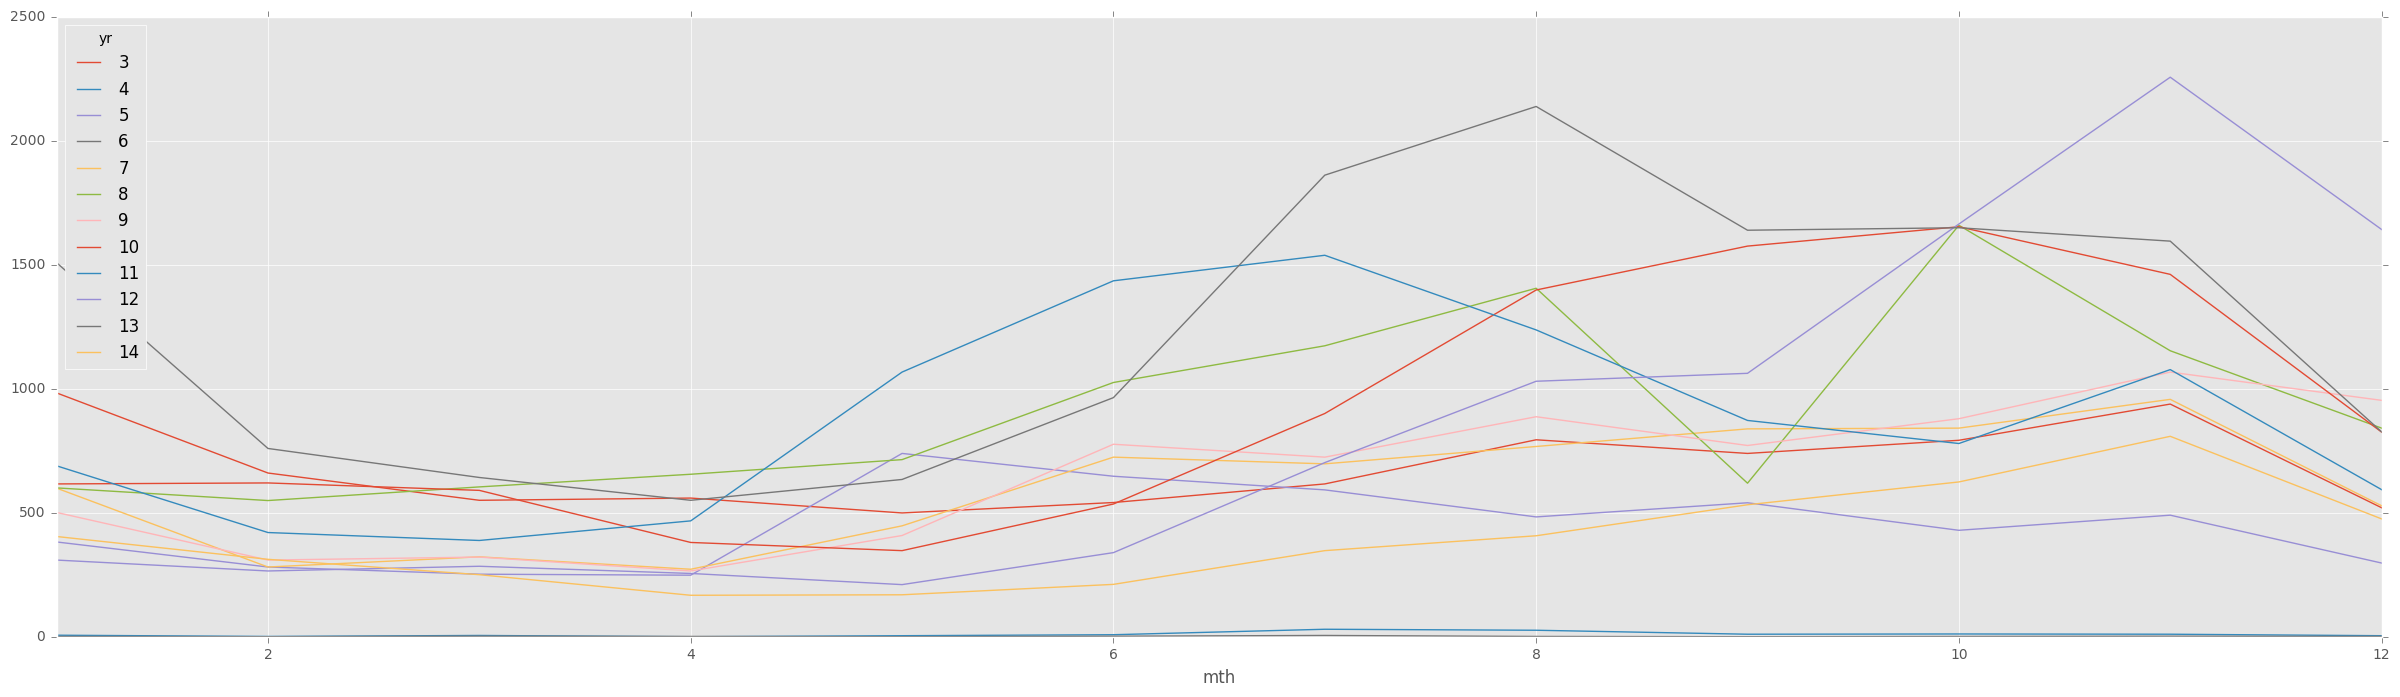

In [403]:
bkk_pivot.plot(figsize=(30,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1286d0f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1268bb290>]], dtype=object)

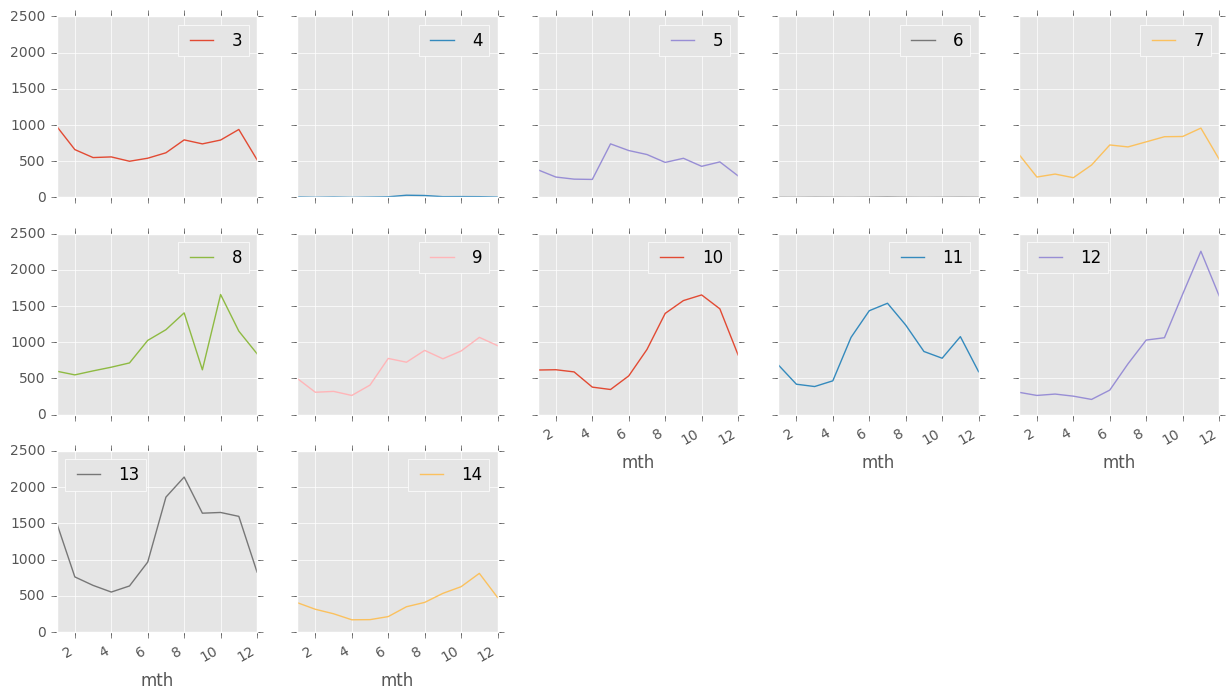

In [404]:
bkk_pivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True)

In [405]:
def simple_seasonal_predictor(year):
    temp = []
    start = 12
#     previous = arr[119]
    n = (year * 12) + 1
    for i in range(n):
        predicted = bkk_df.iloc[start-12].freq + (bkk_df.iloc[start-1].freq - bkk_df.iloc[start-13].freq)
#         previous = predicted
        temp.append(predicted)
        start+=1
    
#     start_mth = datetime.datetime.strptime(start_from, "%Y-%m-%d")
#     date_list = [start_mth + relativedelta(months=x) for x in range(0,n)]
#     return date_list, temp
    return temp



In [406]:
freq = simple_seasonal_predictor(11)

In [408]:
freq = np.array(simple_seasonal_predictor(11))
nans = np.array([0 for i in range(11)])
freq = np.concatenate((nans,freq),axis=0)

bkk_df['prediction'] = pd.Series(freq)

In [409]:
start_mth = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start_mth + relativedelta(months=x) for x in range(0,144)]
bkk_df['date'] = pd.Series(date_list)
bkk_df= bkk_df.set_index(bkk_df.date)

In [413]:
# bkk_df.plot(kind="line", x='date', y=['freq','prediction'],figsize=(30,8))
# bkk_df.plot(kind="line", x='date', y='freq',figsize=(30,8))

### To plot all provinces and its dengue

In [411]:
# allProvinces_df.columns = ['โรค','รหัสจังหวัด','date']
# dates = allProvinces_df['date']
# temp = cleanDate(dates).astype("datetime64")
# df = pd.DataFrame(temp,columns=['date'])
# df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))